# Report

In this notebook we report progress on the project of house price prediction.

In [1]:
import os
from functools import partial

In [2]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests

In [3]:
import data
import metrics

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
def evaluate_model(*, model, metric, X_train, y_train, X_test, y_test):
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)
    train_error = metric(y_train, train_predictions)
    test_error = metric(y_test, test_predictions)
    return {
        "train_predictions": train_predictions,
        "test_predictions": test_predictions,
        "train_error": train_error,
        "test_error": test_error
    }

def print_report(*, model, evaluation):
    print(f"Model used:\n\t{reg}")
    print(f"Error:\n\ttrain set {evaluation['train_error']}\n\ttest error: {evaluation['test_error']}")

In [6]:
models_dir = "models"
dataset_path = "./data/train_regression.csv"
dataset = data.get_dataset(
    partial(pd.read_csv, filepath_or_buffer=dataset_path),
    splits=("train", "test")
)

**If you need to visualize anything from your training data, do it here**

In [11]:
X_test_regression = pd.read_csv("./data/test_regression_students.csv")

In [39]:
X_test_regression.head()
X_test_regression["bmi"].hist()

,age,sex,bmi,children,smoker,region
36,21,female,26.40,1,no,southwest
37,43,female,29.90,1,no,southwest
38,52,female,24.13,1,yes,northwest
39,36,male,35.20,1,yes,southeast


<AxesSubplot:>

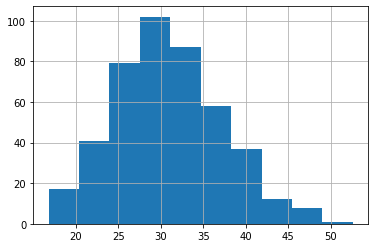

In [46]:
X_test_regression["bmi"].hist()

## Baseline

Before doing any complex Machine Learning model, let's try to solve the problem by having an initial educated guess. 

In [7]:
model_path = os.path.join("models", "Baseline", "model.joblib")
reg = joblib.load(model_path)
evaluation = evaluate_model(
    model=reg,
    metric=metrics.custom_error,
    X_train=dataset["train"][0],
    y_train=dataset["train"][1],
    X_test=dataset["test"][0],
    y_test=dataset["test"][1]
)
print_report(model=reg, evaluation=evaluation)

Model used:
	Pipeline(steps=[('average-charges-extractor',
                 AverageChargesPerRegionExtractor()),
                ('average-charges-regressor',
                 AverageChargesPerRegionRegressor())])
Error:
	train set 10205.154465694815
	test error: 11311.63383175935


## Linear Regression Model 

We want to try easy things first, so know lets see how a linear regression model does.

In [30]:
model_path = os.path.join("models", "2021-06-16 00-37", "model.joblib")
reg = joblib.load(model_path)
evaluation = evaluate_model(
    model=reg,
    metric=metrics.custom_error,
    X_train=dataset["train"][0],
    y_train=dataset["train"][1],
    X_test=dataset["test"][0],
    y_test=dataset["test"][1]
)
print_report(model=reg, evaluation=evaluation)

Model used:
	Pipeline(steps=[('categorical-encoder',
                 CategoricalEncoder(force_dense_array=True, one_hot=True)),
                ('standard-scaler', StandardScaler()),
                ('linear-regressor', LinearRegression())])
Error:
	train set 4861.561142686977
	test error: 4859.071715111847


**Error Analysis**

What can you learn about the errors your model is making? Try this:

* Discretize the errors your model is making by some categorical variables.
* Sort and discretize the errors your model is making and see what the features have in common in those cases. 

In [31]:
y_predictions_LR = reg.predict(X_test_regression)
y_predictions_LR = pd.DataFrame(y_predictions_LR, columns = ['y_pred'])
y_predictions_LR.to_csv(path_or_buf="./data/y_predictions_LR.csv", sep=',', index=False ,float_format='%.15f')

## Linear regression with Feature Engineering

Probably the previous model is not good enough, let's see how is the performance of a model using some produced features.

Techniques:
1. Feature Cross
2. Discretizer
3. Add average per neighborhood.


In [8]:
model_path = os.path.join("models", "Linear regression features", "model.joblib")
reg = joblib.load(model_path)
evaluation = evaluate_model(
    model=reg,
    metric=metrics.custom_error,
    X_train=dataset["train"][0],
    y_train=dataset["train"][1],
    X_test=dataset["test"][0],
    y_test=dataset["test"][1]
)
print_report(model=reg, evaluation=evaluation)

Model used:
	Pipeline(steps=[('average-charges-extractor',
                 AverageChargesPerRegionExtractor()),
                ('discretizer',
                 Discretizer(bins_per_column={'bmi': 2}, strategy='kmeans')),
                ('categorical-encoder',
                 CategoricalEncoder(force_dense_array=True, one_hot=True)),
                ('standard-scaler', StandardScaler()),
                ('linear-regressor', LinearRegression())])
Error:
	train set 4482.200870028673
	test error: 4438.070034238123


In [9]:
model_path = os.path.join("models", "2021-06-17 02-18", "model.joblib")
reg = joblib.load(model_path)
evaluation = evaluate_model(
    model=reg,
    metric=metrics.custom_error,
    X_train=dataset["train"][0],
    y_train=dataset["train"][1],
    X_test=dataset["test"][0],
    y_test=dataset["test"][1]
)
print_report(model=reg, evaluation=evaluation)

Model used:
	Pipeline(steps=[('average-charges-extractor',
                 AverageChargesPerRegionExtractor()),
                ('discretizer',
                 Discretizer(bins_per_column={'bmi': 2}, strategy='kmeans')),
                ('categorical-encoder',
                 CategoricalEncoder(force_dense_array=True, one_hot=True)),
                ('standard-scaler', StandardScaler()),
                ('bagging', BaggingRegressor())])
Error:
	train set 1407.2089649621523
	test error: 2767.5847152213423


In [15]:
predictions_bagging = reg.predict(X_test_regression)
predictions_bagging = pd.DataFrame(predictions_bagging, columns = ['y_pred'])
predictions_bagging = list(predictions_bagging["y_pred"])
predictions_bagging

[8716.168020000001,
 5285.534365000001,
 28272.462785,
 9018.36404,
 36005.936975000004,
 4960.172659999998,
 2133.630192333333,
 14247.731,
 3619.209635,
 16131.069501999998,
 19492.191150000002,
 6820.83725,
 4434.386369999999,
 40912.114239999995,
 46150.33332,
 41000.6018,
 13396.310965,
 41234.61273000001,
 8233.9965325,
 26731.412021999997,
 6130.03234,
 7292.119229999999,
 1349.6788000000001,
 2407.24331,
 11050.098615,
 10684.411185,
 14614.651130000002,
 7076.521444666667,
 11103.478597,
 1537.5523641666664,
 7278.7898049999985,
 13712.333892999999,
 2715.3205905,
 5623.034635,
 3551.022495,
 7319.302826666666,
 2549.849135,
 7307.001474999999,
 23952.060999999998,
 40343.85419999999,
 4601.130716,
 7492.006485000001,
 11431.334859999999,
 12050.35799,
 9070.094496999998,
 16291.341026,
 2976.4745199999998,
 5430.931739000001,
 40840.53781999999,
 7739.088889000001,
 13792.403780000002,
 6913.679190000001,
 6762.974215,
 1704.9598483333332,
 13747.975424,
 11691.348994,
 3789.

In [8]:
from sklearn.metrics import f1_score

In [9]:

model_path = os.path.join("models", "2021-06-17 00-30", "model.joblib")
reg = joblib.load(model_path)
evaluation = evaluate_model(
    model=reg,
    metric=f1_score,
    X_train=dataset["train"][0],
    y_train=dataset["train"][1],
    X_test=dataset["test"][0],
    y_test=dataset["test"][1]
)
print_report(model=reg, evaluation=evaluation)

Model used:
	Pipeline(steps=[('logistic-regressor', LogisticRegression())])
Error:
	train set 0.911242603550296
	test error: 0.8275862068965517


In [10]:
X_test_classification = pd.read_csv("./data/test_classification_students.csv")

In [19]:
y_predictions_LogisticR = reg.predict(X_test_classification)
y_predictions_LogisticR = pd.DataFrame(y_predictions_LogisticR, columns = ['y_pred'])
y_predictions_LogisticR.to_csv(path_or_buf="./data/y_predictions_LogisticR.csv", sep=',', index=False)

In [23]:
cosa = list(y_predictions_LogisticR["y_pred"])

In [24]:
import json

nombres = "CarlosArbelaez;JimmyRomero;AlbertoLizcano;DavidRodriguez"
mails = "carlos.arbelaezg@udea.edu.co"
URL = "https://qzbbjszmjk.execute-api.us-east-1.amazonaws.com/dev"

results = {"id": nombres ,"email": mails, "task_type": "Classification" ,"predictions": cosa}
headers = {'Content-type': 'application/json', 'Accept': 'text/plain'}

r = requests.post(url= URL+"/benchmarkin/", data = json.dumps(results) , headers=headers)

In [25]:
r.text

'{"F1":0.546875}'

In [56]:
y_predictions_LRF = reg.predict(X_test_regression)
y_predictions_LRF = list(y_predictions_LRF)
y_predictions_LRF 

[8231.21680349153,
 5795.325367967096,
 36322.41479777629,
 9509.891945539726,
 28679.406670600463,
 9057.949948683734,
 1191.3133574690892,
 17922.486462341534,
 3216.982152946355,
 10322.364653274668,
 27175.794238904477,
 7950.659445957905,
 3637.466050272278,
 36139.79401394883,
 39315.99935664114,
 36205.50692983689,
 13412.154318991716,
 35609.4053514279,
 8241.478060770285,
 30635.105843631696,
 3287.884875110338,
 11700.479391912144,
 637.3828595225332,
 5745.128967939374,
 10202.19863080091,
 14411.504517112093,
 15503.27850397758,
 3973.241204833019,
 8772.865275314824,
 844.278393605975,
 6754.146835376061,
 15635.726552574597,
 5418.853073418419,
 4785.713912567962,
 2738.26383092765,
 12365.07665229267,
 993.1523929840096,
 6951.285583040253,
 33277.6352868601,
 33021.32901478519,
 1271.949201255049,
 6752.979874075923,
 14625.092880354574,
 12415.27305232039,
 9469.95680279076,
 11675.463616012015,
 6296.276699802456,
 2486.671976677768,
 35327.32130621389,
 8928.30833096

In [16]:
import json

nombres = "CarlosArbelaez;JimmyRomero;AlbertoLizcano;DavidRodriguez"
mails = "carlos.arbelaezg@udea.edu.co"
URL = "https://qzbbjszmjk.execute-api.us-east-1.amazonaws.com/dev"

results = {"id": nombres ,"email": mails, "task_type": "Regression" ,"predictions": predictions_bagging}
headers = {'Content-type': 'application/json', 'Accept': 'text/plain'}

r = requests.post(url= URL+"/benchmarkin/", data = json.dumps(results) , headers=headers)

In [17]:
r.text

'{"MAE":3063.576724344342}'

In [ ]:
y_predictions_LRF.to_csv(path_or_buf="./data/y_predictions_LRF.csv", sep=',', index=False ,float_format='%.15f')

**Error Analysis**

What can you learn about the errors your model is making? Try this:

* Discretize the errors your model is making by some categorical variables.
* Sort or discretize the errors your model is making and see what the features have in common in those cases. 

In [69]:
import sweetviz as sv

In [70]:
classifi = pd.read_csv("./data/train_classification.csv")

In [71]:
my_report = sv.analyze(classifi)
my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Carreta asociada